In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy import signal

## Chapter 2 Question 7

一个因果离散时间的LTI系统有两个复共轭极点 $p_1 = 0.8e^{j\frac{\pi}{4}}, p_2 = 0.8e^{-j\frac{\pi}{4}}$和一个2阶零点$z_{1,2} = 0$ 且 $H(\infty) = 1$ 请回答下列问题

(1) 求该系统的系统函数$H(z)$，画出零极点图并且指出收敛域

由题意可知, $H(z) = A\frac{z^2}{(z-p_1)(z-p_2)}$, 并且$H(\infty) = 1$ 可以得到 $A = 1$, 而且由于是因果LTI系统，所以可以得到ROC为$|z| \ge 0.8$

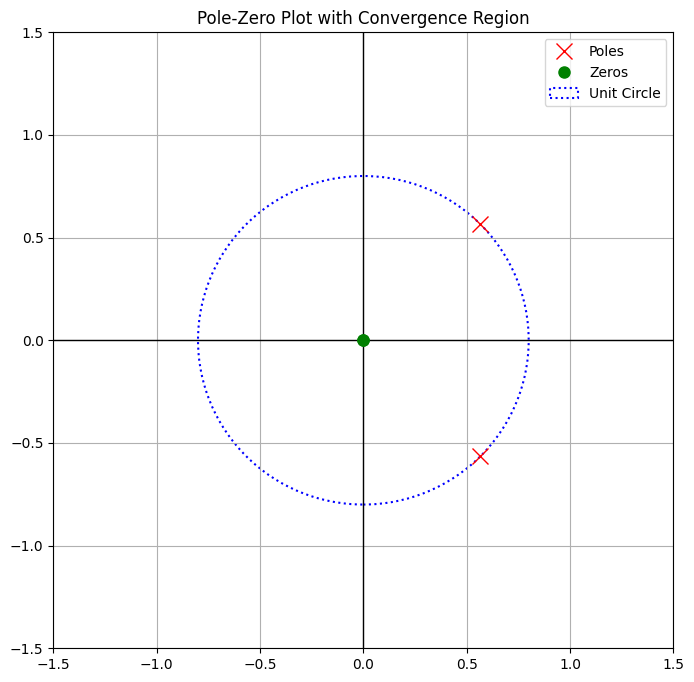

In [6]:
# Define the poles and zeros
poles = [0.8*np.exp(1j*np.pi/4), 0.8*np.exp(-1j*np.pi/4)]
zeros = [0, 0]  # Two zeros at the origin

# Create a new figure with a set size
plt.figure(figsize=(8, 8))

# Plot the complex plane with a cross at the origin
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Plot the poles and zeros
plt.plot(np.real(poles), np.imag(poles), 'rx', markersize=12, label='Poles')
plt.plot(np.real(zeros), np.imag(zeros), 'go', markersize=8, label='Zeros')

# Set the limits of the plot
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Add a unit circle to indicate the convergence region
unit_circle = Circle((0,0), 0.8, color='blue', fill=False, linestyle='dotted', linewidth=1.5, label='Unit Circle')
plt.gca().add_artist(unit_circle)

# Add grid, legend, and title
plt.grid()
plt.legend()
plt.title('Pole-Zero Plot with Convergence Region')

# Show the plot
plt.show()

(2) 根据系统函数的零极点图画出该系统的频辐响应曲线：

可以知道$H(e^{jw}) = H(z)|_{z=e^{jw}} = \frac{1}{(e^{jw} - p_1)(e^{jw} - p_2)}$，可以作出如下曲线:

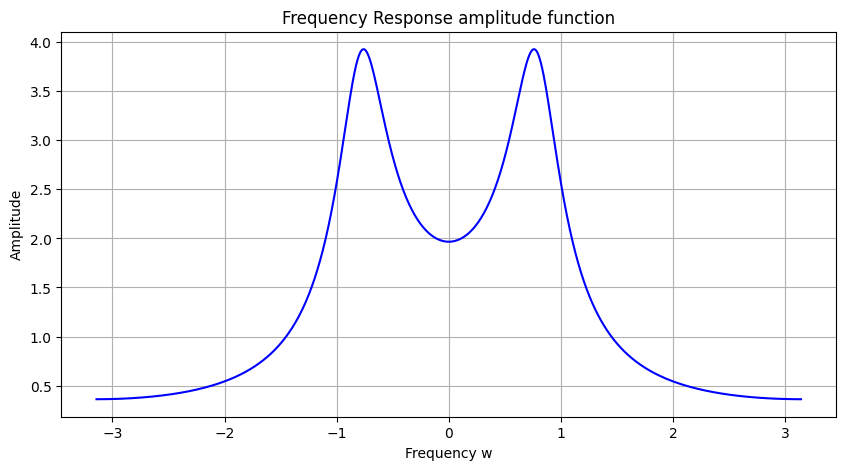

In [7]:
# define function
def H_exp(expjw, p1, p2):
    return expjw**2 / ((expjw - p1) * (expjw - p2))
func = np.vectorize(H_exp)

# Poles are complex conjugates, so the polynomial will have real coefficients
# (z - p1)(z - p2) = z^2 - (p1 + p2)*z + p1*p2
p1 = poles[0]
p2 = poles[1]

w = np.linspace(-np.pi, np.pi, 1000)
expjw = np.exp(w * 1j)
H_exp = np.abs(func(expjw, p1, p2))

plt.figure(figsize=(10, 5))
plt.plot(w, H_exp, 'b')
plt.title('Frequency Response amplitude function')
plt.xlabel('Frequency w')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


(3) 求系统输入$x(n) = e^{j(\frac{\pi}{4}n + \frac{\pi}{2})}$的稳态响应$y(n)$

当$w=\frac{\pi}{4}$时，有$H(e^{jw}) = 3.04 - 2.44j, |H(e^{jw})| = 3.904, argc(H(e^{jw})) = -0.21\pi$ 带入有，$y(n) = 3.904e^{j(\frac{\pi}{4}n + 0.29\pi)}$

In [8]:
w0 = np.array([np.exp(1j*np.pi / 4)])
value = func(w0, p1, p2)[0]
print('H(exp(jw)) =', value)
print('|H(exp(jw))| =', np.abs(value))

angle = np.angle(value) / np.pi
print('argc(H(exp(jw))) = %fpi' %angle)

H(exp(jw)) = (3.04878048780488-2.439024390243904j)
|H(exp(jw))| = 3.904344047215154
argc(H(exp(jw))) = -0.214777pi
